In [74]:
#import required modules

import nltk
import numpy as np
import os

In [75]:
# download twitter dataset sample.

nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [76]:
# download the stopwords.

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
 #List of files and directories within the NLTK corpora

print(os.listdir(nltk.data.find("corpora")))

['twitter_samples', 'stopwords.zip', 'stopwords', 'twitter_samples.zip']


In [78]:
#List of file identifiers

nltk.corpus.twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [79]:
#import sample twitter dataset

from nltk.corpus import twitter_samples

In [80]:
#print length of positive tweets and actual content of those tweets

print(len(twitter_samples.strings('positive_tweets.json')))
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
# Print lines 1 to 15 of the positive tweets
for tweet in positive_tweets[1:16]:
    print(tweet)


5000
@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
@97sides CONGRATS :)
yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days
@BhaktisBanter @PallaviRuhail This one is irresistible :)
#FlipkartFashionFriday http://t.co/EbZ0L2VENM
We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI
@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.
Jgh , but we have to go to Bayan :D bye
As an act of mischievousness, am calling the ETL layer of our in-house warehousing app Katamari.

Well… as the name implies :p.
#FollowFriday @wncer1 @Defense_gouv for being top influencers in my community this week :)
Who Wouldn

In [81]:
#print length of negative tweets and actual content of those tweets

print(len(twitter_samples.strings('negative_tweets.json')))
negative_tweets = twitter_samples.strings('negative_tweets.json')
# Print lines 1 to 15 of the negative tweets
for tweet in negative_tweets[1:16]:
    print(tweet)

5000
Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(
@Hegelbon That heart sliding into the waste basket. :(
“@ketchBurning: I hate Japanese call him "bani" :( :(”

Me too
Dang starting next week I have "work" :(
oh god, my babies' faces :( https://t.co/9fcwGvaki0
@RileyMcDonough make me smile :((
@f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http://t.co/XvmTUikWln
why?:("@tahuodyy: sialan:( https://t.co/Hv1i0xcrL2"
Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http://t.co/dZZdqmf7Cz
I have a really good m&amp;g idea but I'm never going to meet them :(((
@Rampageinthebox mare ivan :(
@SophiaMascardo happy trip, keep safe. see you soon :* :(
I'm so tired hahahah :(
@GrumpyCockney With knee replacements they get you up &amp; about the same day. :-(   Ouch.
relate to the "sweet n' sour" kind of "bi-polar" people in your life...

In [121]:
#Preparing the data

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

# concatenate the positive tweets and the negative tweets. Print the total length of tweets
all_tweets = positive_tweets + negative_tweets
print(len(all_tweets))
# Print lines 1 to 30 of the all tweets
for tweet in all_tweets[1:31]:
    print(tweet)

10000
@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
@97sides CONGRATS :)
yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days
@BhaktisBanter @PallaviRuhail This one is irresistible :)
#FlipkartFashionFriday http://t.co/EbZ0L2VENM
We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI
@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.
Jgh , but we have to go to Bayan :D bye
As an act of mischievousness, am calling the ETL layer of our in-house warehousing app Katamari.

Well… as the name implies :p.
#FollowFriday @wncer1 @Defense_gouv for being top influencers in my community this week :)
Who Would

In [83]:
# spilt the tweets(70% for training, 30% for testing)

positive_train = positive_tweets[0:3500]
positive_test = positive_tweets[3500:]
negative_train = negative_tweets[0:3500]
negative_test = negative_tweets[3500:]

X_train = positive_train + negative_train
X_test = positive_test + negative_test
all_X = X_train + X_test

In [84]:
#Create the numpy array of positive labels and negative labels filled with 1's and 0's respectively
#Combine them to form all_y

y_train = np.append(np.ones((len(positive_train), 1)), np.zeros((len(negative_train), 1)), axis=0)
y_test = np.append(np.ones((len(positive_test), 1)), np.zeros((len(negative_test), 1)), axis=0)
all_y = y_train.tolist() + y_test.tolist()

In [85]:
# Print the shape of train and test data

print("y_train.shape = " + str(y_train.shape))
print("y_test.shape = " + str(y_test.shape))

y_train.shape = (7000, 1)
y_test.shape = (3000, 1)


In [86]:
#import modules and libraries for data preprocessing

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from nltk.tokenize import TweetTokenizer
import string

In [87]:
#Print stopwords and its length

print(len(stopwords.words('english')))
print(stopwords.words('english'))

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [88]:
#Print punctuations and its length

print(len(string.punctuation))
print(string.punctuation)

32
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [89]:
print(PorterStemmer().stem('Beautiful'))

beauti


In [90]:
#data preprocessing

def preprocess_tweet(tweet):

    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags
    tweet = re.sub(r'#', '', tweet)

    #remove @mentions
    tweet = re.sub(r'(?<=@)\w+', '', tweet)

    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove stock market tickers
    tweet = re.sub(r'\$\w*', '', tweet)

    #remove digits
    tweet = re.sub(r'[0-9]+', '', tweet)

    #remove symbols
    tweet = re.sub(r'\W+|_', ' ', tweet)

    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    clean_tweets = []
    for word in tweet_tokens:
        if (word not in stopwords_english and word not in string.punctuation): # remove stopwords # remove punctuation
            stem_word = stemmer.stem(word)  # stemming word
            clean_tweets.append(stem_word)

    #return cleaned_tweet
    return clean_tweets

In [91]:
#example of preprocessing a tweet

print(preprocess_tweet("RT @me It costs $30 for one set. :) LOL haha haha good good  :b #item #Justiceforssss "))

['cost', 'one', 'set', 'lol', 'haha', 'haha', 'good', 'good', 'b', 'item', 'justiceforsss']


In [92]:
def clean_tweet(tweet):

    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags
    tweet = re.sub(r'#', '', tweet)

    #remove @mentions
    tweet = re.sub(r'(?<=@)\w+', '', tweet)

    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove stock market tickers
    tweet = re.sub(r'\$\w*', '', tweet)

    #remove digits
    tweet = re.sub(r'[0-9]+', '', tweet)

    #remove symbols
    tweet = re.sub(r'\W+|_', ' ', tweet)

    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and word not in string.punctuation):  # remove stopwords # remove punctuation
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    cleaned_tweet = ' '.join(map(str, tweets_clean))

    return cleaned_tweet

In [93]:
#example of clean tweet

print(clean_tweet("RT @me It costs $30 for one set. :) LOL haha haha good good  :b #item #Justiceforssss "))

cost one set lol haha haha good good b item justiceforsss


In [94]:
import pandas as pd

In [95]:
# Create a DataFrame to store tweet data and corresponding labels

df=pd.DataFrame()
df['Tweet']=all_X
df['Label']=all_y

In [96]:
#preprocess all the tweets

df['Preprocessed'] = [preprocess_tweet(i) for i in df['Tweet']]

In [97]:
#clean all the tweets

df['Clean_Tweet'] = [clean_tweet(i) for i in df['Tweet']]

In [98]:
#find length of each tweet and add it to dataframe

df['total_len'] = df['Preprocessed'].map(lambda x: len(x))

In [99]:
#find positive and negative words using given datasets

file = open(r'positive-words.txt', 'r')
pos_words = file.read().split()
file.close()

file = open(r'negative-words.txt', 'r')
neg_words = file.read().split()

In [100]:
#find number of positive words in tweet

num_pos = df['Preprocessed'].map(lambda x: len([i for i in x if i in pos_words]))
df['pos_count'] = num_pos

In [101]:
#find number of negative words in a tweet

num_neg = df['Preprocessed'].map(lambda x: len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg

In [102]:
#give sentiment value for each tweet

df['sentiment'] = round((df['pos_count'] - df['neg_count']), 2)
df.head()

,Tweet,Label,Preprocessed,Clean_Tweet,total_len,pos_count,neg_count,sentiment
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,[1.0],"[followfriday, top, engag, member, commun, week]",followfriday top engag member commun week,6,1,0,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,[1.0],"[hey, jame, odd, pleas, call, contact, centr, ...",hey jame odd pleas call contact centr abl assi...,11,1,2,-1
2,@DespiteOfficial we had a listen last night :)...,[1.0],"[listen, last, night, bleed, amaz, track, scot...",listen last night bleed amaz track scotland,7,0,1,-1
3,@97sides CONGRATS :),[1.0],[congrat],congrat,1,0,0,0
4,yeaaaah yippppy!!! my accnt verified rqst has...,[1.0],"[yeaaah, yipppi, accnt, verifi, rqst, succeed,...",yeaaah yipppi accnt verifi rqst succeed got bl...,13,1,0,1


In [103]:
#divide tweets to different class(positive, negative, neutral)

sentiment_class = df['sentiment'].map(lambda x: 'Neutral' if x==0 else('Positive' if x>0 else('Negative' if x<0 else print(""))))

In [104]:
df['sentiment_class']=sentiment_class
df.head()

,Tweet,Label,Preprocessed,Clean_Tweet,total_len,pos_count,neg_count,sentiment,sentiment_class
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,[1.0],"[followfriday, top, engag, member, commun, week]",followfriday top engag member commun week,6,1,0,1,Positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,[1.0],"[hey, jame, odd, pleas, call, contact, centr, ...",hey jame odd pleas call contact centr abl assi...,11,1,2,-1,Negative
2,@DespiteOfficial we had a listen last night :)...,[1.0],"[listen, last, night, bleed, amaz, track, scot...",listen last night bleed amaz track scotland,7,0,1,-1,Negative
3,@97sides CONGRATS :),[1.0],[congrat],congrat,1,0,0,0,Neutral
4,yeaaaah yippppy!!! my accnt verified rqst has...,[1.0],"[yeaaah, yipppi, accnt, verifi, rqst, succeed,...",yeaaah yipppi accnt verifi rqst succeed got bl...,13,1,0,1,Positive


In [105]:
#tf-idf vectorizing

X_train = df['Clean_Tweet'][:7000]
y_train = df['sentiment_class'][:7000]
X_test = df['Clean_Tweet'][7000:]
y_test = df['sentiment_class'][7000:]

In [106]:
#convert document into matrix of tf-idf features

from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvect = TfidfVectorizer(min_df=5, max_df=0.75, ngram_range=(1,3),max_features=10000)
vect=tfidfvect.fit(X_train)

In [107]:
#convert xtrain into tfidfvectorizer

x_train_vectorized = vect.transform(X_train)

In [108]:
#Tfidf Frequencies

print(x_train_vectorized)

  (0, 1406)	0.18425826319676247
  (0, 1313)	0.2812394048169353
  (0, 1312)	0.2812394048169353
  (0, 1311)	0.22400076145365733
  (0, 842)	0.2812394048169353
  (0, 841)	0.2812394048169353
  (0, 840)	0.24390314368202864
  (0, 460)	0.2812394048169353
  (0, 459)	0.23893259842920062
  (0, 458)	0.2374189926090719
  (0, 354)	0.2812394048169353
  (0, 353)	0.2812394048169353
  (0, 352)	0.2812394048169353
  (0, 232)	0.2374189926090719
  (0, 231)	0.23193672099196128
  (1, 1264)	0.19150143291998095
  (1, 982)	0.23029597191390874
  (1, 828)	0.4155392776254838
  (1, 827)	0.32204468584388984
  (1, 685)	0.3938672001553045
  (1, 605)	0.3003726083737106
  (1, 244)	0.3938672001553045
  (1, 170)	0.3232194566431372
  (1, 0)	0.3590933469862049
  (2, 1324)	0.5010889801520865
  :	:
  (6995, 916)	0.42206794108400253
  (6995, 724)	0.37285366959106625
  (6995, 522)	0.5492700702249249
  (6996, 1451)	0.7708580594588115
  (6996, 589)	0.6370069482881606
  (6997, 1060)	0.5170643151229525
  (6997, 862)	0.49374283542347

In [109]:
#MultinomialNB

from sklearn.naive_bayes import MultinomialNB

In [110]:
#create and fit Multinomial Naive Bayes Model

model = MultinomialNB().fit(x_train_vectorized,y_train)

In [111]:
#predict label for test data

pred = model.predict(vect.transform(X_test))

In [112]:
print(pred)

['Positive' 'Neutral' 'Neutral' ... 'Neutral' 'Neutral' 'Positive']


In [113]:
#compute confusion matrix using true labels and predicted labels

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
confusion_matrix(y_test, pred)

array([[ 214,  320,    3],
       [  19, 1536,   58],
       [   1,  335,  514]])

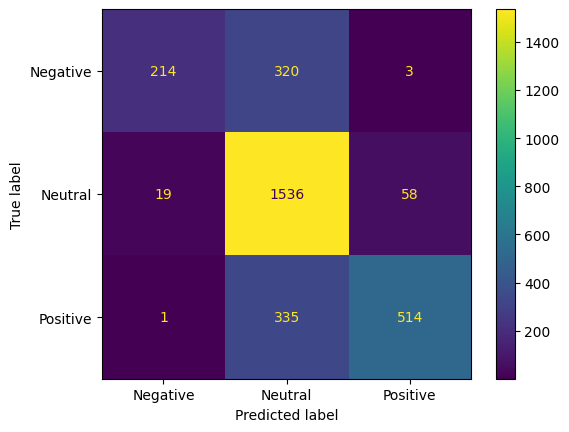

In [114]:
#visulaize confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [115]:
#print accuracy and f1 score of the multinomial model

print("accuracy-score =", accuracy_score(y_test, pred) * 100)
print("f1-score =", f1_score(y_test, pred,average='weighted') * 100)

accuracy-score = 75.46666666666667
f1-score = 73.79687123843397


In [116]:
#textblob

from textblob import TextBlob

In [117]:
#analyze sentiment polarity of a given text and print sentiment category

text = "#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)"
textblob_polarity = TextBlob(text).sentiment.polarity
print("Polarity : ",textblob_polarity)
if(textblob_polarity==0):
    print("Neutral")
elif(textblob_polarity>0.0 ):
    print("Positive")
elif(textblob_polarity<0.0 ):
    print("Negative")


Polarity :  0.5
Positive


In [118]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'
df['Sentiment'] = df['Clean_Tweet'].apply(get_sentiment)


In [119]:
sentiment_counts = df['Sentiment'].value_counts()


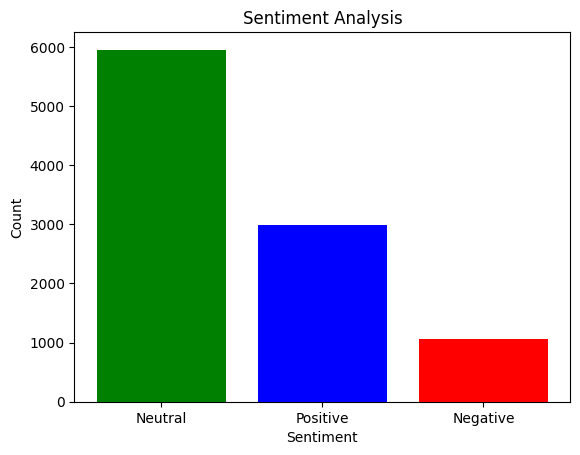

In [120]:
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green','blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()